In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.spatial.distance import cdist
%matplotlib inline

In [2]:
df = pd.read_csv("./중구대여반납_거치대24_group_6_10.csv")

# group=='많음' 군집화

In [3]:
df_large=df[df['group']=='많음']
df_large=df_large.drop(['대여소번호','대여수','반납수','거치대수','(반납-대여)/거치대수','group'], 1)
len(df_large)

10

Text(-14.325000000000003, 0.5, 'y')

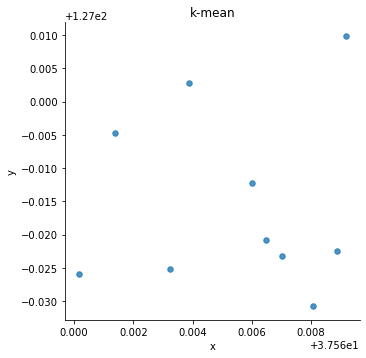

In [4]:
sb.lmplot(x='위도' , y='경도', data=df_large, fit_reg=False, scatter_kws={"s":30}) 
plt.title('k-mean')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
X = df_large.values ## 인덱스를 제외한 값을 ndarray로 추출
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

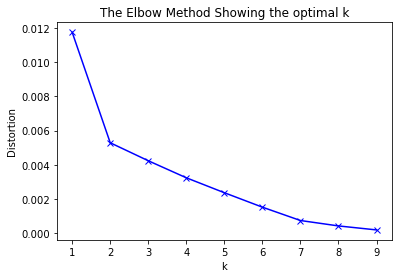

In [6]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the optimal k')
plt.show()

In [7]:
#points=df.values
points=df_large.values
kmeans=KMeans(n_clusters=4).fit(points)

In [8]:
kmeans.cluster_centers_

array([[ 37.56805038, 126.9692307 ],
       [ 37.56652451, 127.00631335],
       [ 37.56369018, 126.99157335],
       [ 37.56514969, 126.97650148]])

In [9]:
kmeans.labels_

array([0, 3, 2, 1, 3, 1, 2, 3, 3, 3])

In [10]:
df_large['cluster'] = kmeans.labels_
df_large

,위도,경도,cluster
0,37.568050,126.969231,0
1,37.568878,126.977470,3
6,37.565990,126.987793,2
8,37.569183,127.009880,1
10,37.563229,126.974838,3
14,37.563866,127.002747,1
19,37.561390,126.995354,2
26,37.560154,126.974106,3
37,37.567017,126.976837,3
45,37.566471,126.979256,3


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

Text(0.5, 1.0, 'k-mean')

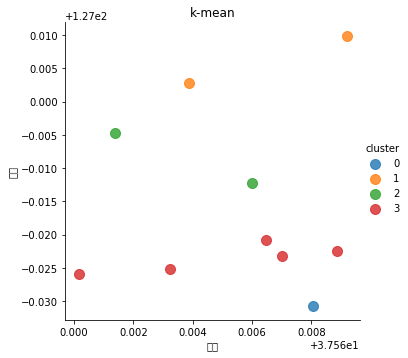

In [11]:
sb.lmplot(x='위도', y='경도', data=df_large, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.title('k-mean')

# group=='적음' 군집화

In [12]:
df_small=df[df['group']=='적음']
df_small=df_small.drop(['대여소번호','대여수','반납수','거치대수','(반납-대여)/거치대수','group'], 1)
len(df_small)

20

Text(-7.950000000000003, 0.5, 'y')

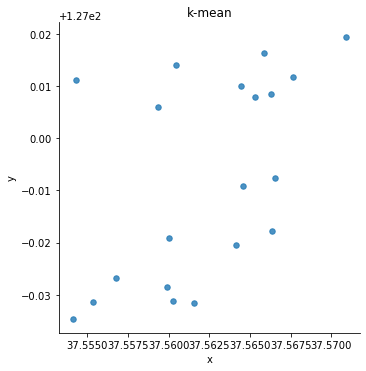

In [13]:
sb.lmplot(x='위도' , y='경도', data=df_small, fit_reg=False, scatter_kws={"s":30}) 
plt.title('k-mean')
plt.xlabel('x')
plt.ylabel('y')

In [14]:
X = df_small.values ## 인덱스를 제외한 값을 ndarray로 추출
distortions = []
K = range(1,7)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

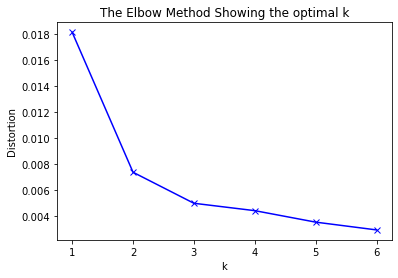

In [15]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the optimal k')
plt.show()

In [16]:
#points=df.values
points=df_small.values
kmeans=KMeans(n_clusters=4).fit(points)

In [17]:
kmeans.cluster_centers_

array([[ 37.5579923 , 126.96933618],
       [ 37.56813303, 127.01591237],
       [ 37.56434173, 126.98518526],
       [ 37.56170082, 127.00959905]])

In [18]:
kmeans.labels_

array([3, 3, 3, 1, 2, 0, 1, 2, 0, 2, 3, 1, 3, 3, 0, 0, 0, 2, 0, 2])

In [19]:
df_small['cluster'] = kmeans.labels_
df_small

,위도,경도,cluster
9,37.565331,127.007843,3
11,37.554295,127.011200,3
12,37.560474,127.014076,3
16,37.565849,127.016403,1
20,37.566559,126.992439,2
21,37.554108,126.965408,0
23,37.570900,127.019524,1
24,37.566345,126.982292,2
25,37.559891,126.971497,0
28,37.564159,126.979485,2


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

Text(0.5, 1.0, 'k-mean')

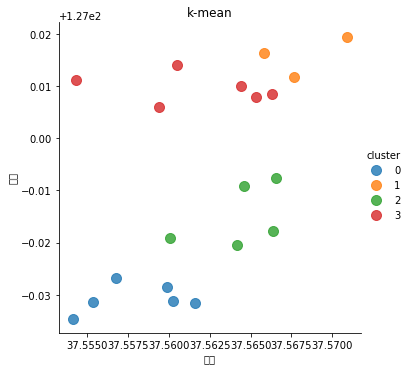

In [20]:
sb.lmplot(x='위도', y='경도', data=df_small, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.title('k-mean')

# 두 그래프 시각화

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

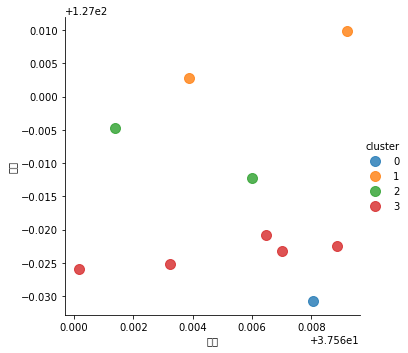

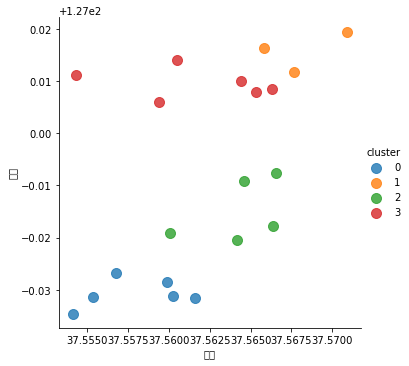

In [21]:
sb.lmplot(x='위도', y='경도', data=df_large, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
sb.lmplot(x='위도', y='경도', data=df_small, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.show()

In [22]:
df_large.loc[(df_large.cluster==0), 'cluster'] = 'D'
df_large.loc[(df_large.cluster==1), 'cluster'] = 'A'
df_large.loc[(df_large.cluster==2), 'cluster'] = 'B'
df_large.loc[(df_large.cluster==3), 'cluster'] = 'C'

In [23]:
df_small.loc[(df_small.cluster==0), 'cluster'] = 'D'
df_small.loc[(df_small.cluster==1), 'cluster'] = 'A'
df_small.loc[(df_small.cluster==2), 'cluster'] = 'C'
df_small.loc[(df_small.cluster==3), 'cluster'] = 'B'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from curre

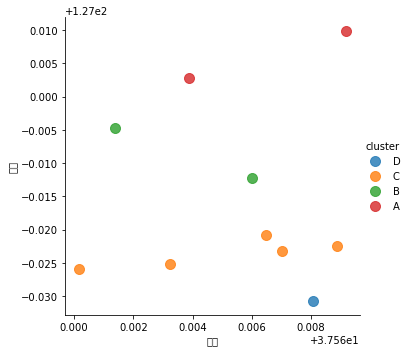

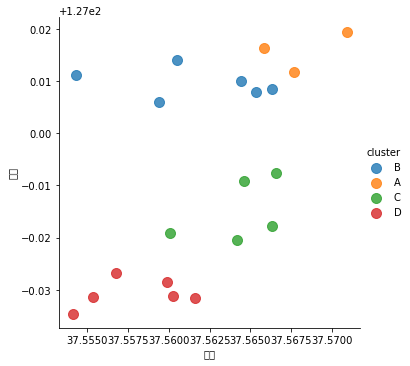

In [24]:
sb.lmplot(x='위도', y='경도', data=df_large, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
sb.lmplot(x='위도', y='경도', data=df_small, fit_reg=False, scatter_kws={"s":100},hue="cluster" )
plt.show()

In [25]:
df=pd.concat([df_large, df_small])
df

,위도,경도,cluster
0,37.568050,126.969231,D
1,37.568878,126.977470,C
6,37.565990,126.987793,B
8,37.569183,127.009880,A
10,37.563229,126.974838,C
14,37.563866,127.002747,A
19,37.561390,126.995354,B
26,37.560154,126.974106,C
37,37.567017,126.976837,C
45,37.566471,126.979256,C


In [26]:
df.to_csv("./k_means(중구, 24, 6-10, k=4)_n.csv",index_label=False,encoding='utf-8')